# Part II - (Presentation Title)
## by (Brian Kinyanjui)

## Investigation Overview


> The presentation, main focus was to take a look at the trends that relate to issuing out of loans. The variables that aided this analysis, are  StatedMonthlyIncome, EmploymentStatus, Loan Original Amount, IsBorrowerHomeowner , IncomeRange and Borrower APR will have effects on the way Loans are issued out by Prosper.


## Dataset Overview

> Loan Data from Prosper: This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# Loading dataset into the Pandas Dataframe
loan_data_df = pd.read_csv('prosperLoanData.csv')
loan_data_df.head(5)

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  
2                         0.0        41  
3                         0.0       158  
4                         0.0        20  

[5 rows x 81 columns]

In [3]:
# Subset Dataframe by selecting features of Interest
loan_analysis_df = loan_data_df[['LoanStatus', 'EmploymentStatus', 'StatedMonthlyIncome','LoanOriginalAmount', 'Term', 'BorrowerState', 'Occupation', 'IsBorrowerHomeowner', 'ListingCategory (numeric)', 'CurrentCreditLines', 'DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable', 'LoanOriginationDate', 'BorrowerAPR', 'ProsperRating (Alpha)', 'EmploymentStatusDuration', 'OpenCreditLines', 'TotalCreditLinespast7years', 'MonthlyLoanPayment']]

In [4]:
loan_analysis_df.isnull().sum()

LoanStatus                        0
EmploymentStatus               2255
StatedMonthlyIncome               0
LoanOriginalAmount                0
Term                              0
BorrowerState                  5515
Occupation                     3588
IsBorrowerHomeowner               0
ListingCategory (numeric)         0
CurrentCreditLines             7604
DebtToIncomeRatio              8554
IncomeRange                       0
IncomeVerifiable                  0
LoanOriginationDate               0
BorrowerAPR                      25
ProsperRating (Alpha)         29084
EmploymentStatusDuration       7625
OpenCreditLines                7604
TotalCreditLinespast7years      697
MonthlyLoanPayment                0
dtype: int64

In [5]:
# Checking percentage of missing values in our columns
# Determining the percentage of the missing values in our columns
# If percentage is significantly lower within an acceptable percentage range then we can drop the missing values
missing_columns = []
for i, col in enumerate(loan_analysis_df.columns):
    missing = (loan_analysis_df[col].isnull().sum()/loan_analysis_df.shape[0]) * 100
    if (missing > 0).all():
        missing_columns.append(col)
    print(f'{i+1}. {col} = {(loan_analysis_df[col].isnull().sum()/loan_analysis_df.shape[0]) * 100}%')

1. LoanStatus = 0.0%
2. EmploymentStatus = 1.9791639239228696%
3. StatedMonthlyIncome = 0.0%
4. LoanOriginalAmount = 0.0%
5. Term = 0.0%
6. BorrowerState = 4.840394252964358%
7. Occupation = 3.149108717975723%
8. IsBorrowerHomeowner = 0.0%
9. ListingCategory (numeric) = 0.0%
10. CurrentCreditLines = 6.673863626390022%
11. DebtToIncomeRatio = 7.507657740681253%
12. IncomeRange = 0.0%
13. IncomeVerifiable = 0.0%
14. LoanOriginationDate = 0.0%
15. BorrowerAPR = 0.02194195037608503%
16. ProsperRating (Alpha) = 25.52638738952228%
17. EmploymentStatusDuration = 6.692294864705935%
18. OpenCreditLines = 6.673863626390022%
19. TotalCreditLinespast7years = 0.6117415764852506%
20. MonthlyLoanPayment = 0.0%


In [6]:
sum(loan_analysis_df.duplicated())

871

In [7]:
loan_analysis_df=loan_analysis_df[loan_analysis_df['ProsperRating (Alpha)'].notnull()]

In [8]:
# The DebtToIncomeRatio and Occupation column play an important role in our dataset for our analysis.
# We'll handle the missing values here by using the mean function in pandas and the fillna function.
# The fillna will fill the missing data with the mean or unknown as per the concerned columns.
loan_analysis_df['DebtToIncomeRatio'] = loan_analysis_df['DebtToIncomeRatio'].fillna(loan_analysis_df['DebtToIncomeRatio'].mean())

In [9]:
loan_analysis_df['Occupation'] = loan_analysis_df['Occupation'].fillna('Unknown')

In [10]:
loan_analysis_df = loan_analysis_df.dropna()

In [11]:
# Converting string object to ordered categorical types.
# convert ProsperRating (Alpha), EmploymenStatus, BorrowerState, IncomeRange, Occupation into ordered categorical types
ordinal_var_dict = {'ProsperRating (Alpha)': ['AA','A','B','C','D','E', 'HR'],

                    'EmploymentStatus': ['Employed', 'Other', 'Full-time', 'Self-employed', 'Not employed',
                                         'Retired', 'Part-time'],

                    'BorrowerState' : ['CA', 'NY', 'TX', 'FL', 'IL', 'OH', 'GA', 'VA', 'NJ', 'PA', 'MI', 'NC', 'MD',
                                       'WA', 'MA', 'MO', 'CO', 'MN', 'IN', 'TN', 'WI', 'CT', 'AZ', 'OR', 'AL', 'NV',
                                       'SC', 'KY', 'KS', 'LA', 'AR', 'OK', 'MS', 'NE', 'UT', 'NH', 'RI', 'ID', 'HI',
                                       'NM', 'DC', 'WV', 'DE', 'MT', 'SD', 'VT', 'AK', 'WY'],

                    'IncomeRange' : ['$50,000-74,999', '$25,000-49,999', '$100,000+', '$75,000-99,999', '$1-24,999',
                                     'Not employed', '$0']
                    }

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    loan_analysis_df[var] = loan_analysis_df[var].astype(ordered_var)

In [12]:
ListingCategory_dict = {0: 'Not Available', 1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business',
                        4: 'Personal Loan', 5: 'Student Use', 6: 'Auto', 7: 'Other', 8: 'Baby&Adoption',
                        9: 'Boat', 10: 'Cosmetic Procedure', 11: 'Engagement Ring', 12: 'Green Loans',
                        13: 'Household Expenses', 14: 'Large Purchases', 15: 'Medical/Dental', 16: 'Motorcycle',
                        17: 'RV', 18: 'Taxes', 19: 'Vacation', 20: 'Wedding Loans'}
loan_analysis_df['ListingCategory'] = loan_analysis_df['ListingCategory (numeric)'].map(ListingCategory_dict)
loan_analysis_df.drop(['ListingCategory (numeric)'], axis=1, inplace=True)

In [13]:
BorrowerState_dict = {'CA': 'California', 'NY': 'New York', 'TX': 'Texas', 'FL': 'Florida', 'IL': 'Illinois',
                      'OH': 'Ohio', 'GA': 'Georgia', 'VA': 'Virginia', 'NJ': 'New Jersey', 'PA': 'Pennsylvania',
                      'MI': 'Michigan', 'NC': 'North Carolina', 'MD': 'Maryland', 'WA': 'Washington',
                      'MA': 'Massachusetts', 'MO': 'Missouri', 'CO': 'Colorado', 'MN': 'Minnesota',
                      'IN': 'Indiana', 'TN': 'Tennessee', 'WI': 'Wisconsin', 'CT': 'Connecticut', 'AZ': 'Arizona',
                      'OR': 'Oregon', 'AL': 'Alabama', 'NV': 'Nevada', 'SC': 'South Carolina', 'KY': 'Kentucky',
                      'KS': 'Kansas', 'LA': 'Louisiana', 'AR': 'Arkansas', 'OK': 'Oklahoma', 'MS': 'Mississippi',
                      'NE': 'Nebraska', 'UT': 'Utah', 'NH': 'New Hampshire', 'RI': 'Rhode Island', 'ID': 'Idaho',
                      'HI': 'Hawaii', 'NM': 'New Mexico', 'DC': 'Washington, D.C.', 'WV': 'West Virginia',
                      'DE': 'Delaware', 'MT': 'Montana', 'SD': 'South Dakota', 'VT': 'Vermont', 'AK': 'Alaska',
                      'WY': 'Wyoming'}
loan_analysis_df['BorrowerState_Alpha'] = loan_analysis_df['BorrowerState'].map(BorrowerState_dict)
loan_analysis_df.drop(['BorrowerState'], axis=1, inplace=True)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)
#### Loan Status of all Prosper issued out loans

It can be observed that most loans are current at 66.7%, followed by Completed loans at 23.2%. To put it simply, 66.7% of the loans are currently active and being serviced by Prosper Borrowers, 23.2% of the loans have been completed as in paid off; thus new loans can be issued out to this existing Borrowers. However 2.7% of the loans are past there due date while 1.2% of the Borrowers have defaulted on there loan payments.

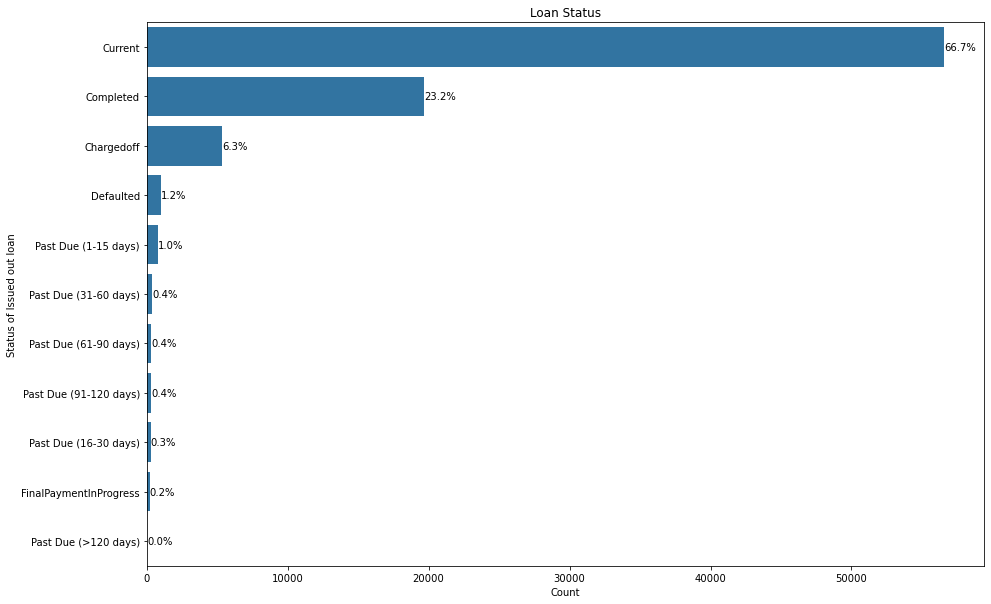

In [14]:
plt.figure(figsize=[15, 10])
base_color = sb.color_palette()[0]
status_order = loan_analysis_df['LoanStatus'].value_counts().index
sb.countplot(data=loan_analysis_df, y='LoanStatus', color=base_color, order=status_order);

# Returns the sum of all not-null values in `LoanStatus` column
loan_count = loan_analysis_df['LoanStatus'].value_counts().sum()

# Count the frequency of unique values in the `LoanStatus` column of loan_analysis_df dataframe.
max_loan_count = loan_analysis_df['LoanStatus'].value_counts()

# Return the maximum proportion, or in other words,
# compute the length of the longest bar in terms of the proportion
max_loan_prop = max_loan_count/loan_count

# Logic to print the proportion text on the bars
for i in range(max_loan_count.shape[0]):
    count = max_loan_count[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}%'.format(100 * count/loan_count)
    # Print the string value on the bar.
    plt.text(count+1, i, pct_string, va='center')

plt.xlabel('Count');
plt.ylabel('Status of Issued out loan');
plt.title('Loan Status');

## (Visualization 2)
#### Income Range for Borrowers

The income range for the majority of the borrowers falls under USD (50,000 - 74,999) which is 30.2% of the total income range. Its then followed by USD (25,000 - 49,999) at 28.5%. At the higher end of the income range scale 35% of the borrowers have incomes ranging from USD (75,000 - 100,000+). To put it simply Borrowers with an income ranging that falls between USD (20,000 - 74,999) take up half of the loan issued out at 58.7% by Prosper.

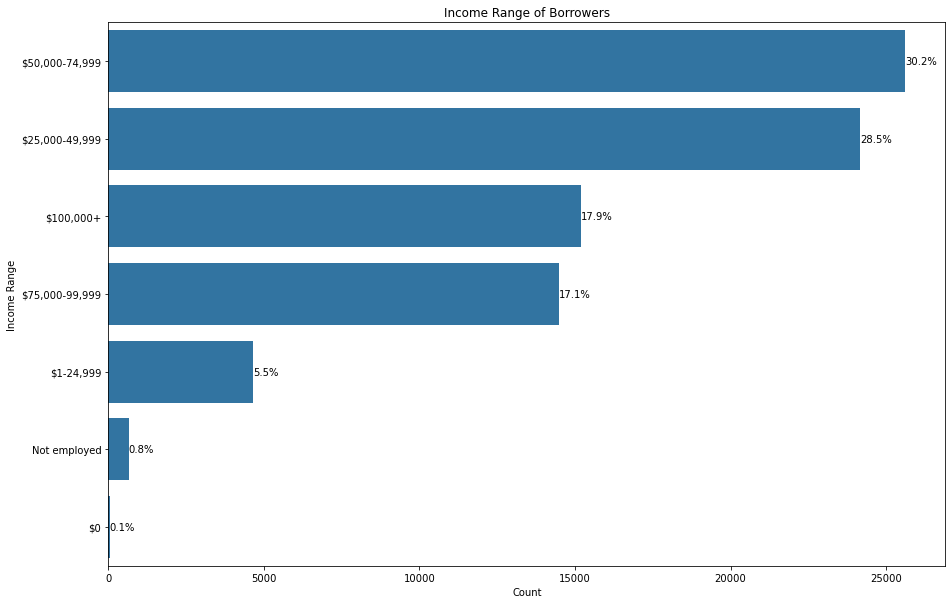

In [15]:
plt.figure(figsize=[15, 10])
status_order = loan_analysis_df['IncomeRange'].value_counts().index
sb.countplot(data=loan_analysis_df, y='IncomeRange', color=base_color, order=status_order);

# Returns the sum of all not-null values in `IncomeRange` column
income_range_count = loan_analysis_df['IncomeRange'].value_counts().sum()

# Count the frequency of unique values in the `IncomeRange` column of loan_analysis_df dataframe.
max_income_range_count = loan_analysis_df['IncomeRange'].value_counts()

# Return the maximum proportion, or in other words,
# compute the length of the longest bar in terms of the proportion
max_income_range_prop = max_income_range_count/income_range_count

# Logic to print the proportion text on the bars
for i in range(max_income_range_count.shape[0]):
    count = max_income_range_count[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}%'.format(100 * count/income_range_count)
    # Print the string value on the bar.
    plt.text(count+1, i, pct_string, va='center')

plt.xlabel('Count');
plt.ylabel('Income Range');
plt.title('Income Range of Borrowers');

## (Visualization 3)
#### Distribution of original loan amount


The distribution seems to be multimodal with multiple peaks. Significant peaks being at 4,000, 10,000, and 15,000

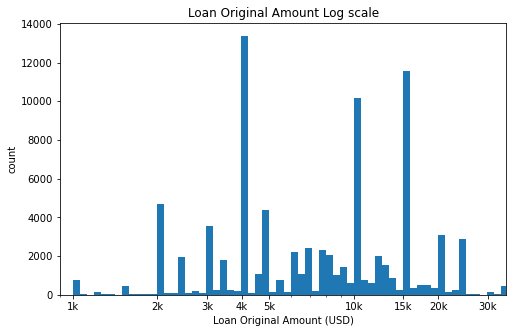

In [16]:
# Loan Original Amount Log Scale Plot
log_binsize = 0.025
bins = 10 ** np.arange(3, np.log10(loan_analysis_df['LoanOriginalAmount'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan_analysis_df, x = 'LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.title('Loan Original Amount Log scale')
plt.xticks([500, 1e3, 2e3, 3e3, 4e3, 5e3, 1e4, 1.5e4, 2e4, 3e4, 5e4],
           [500, '1k', '2k','3k', '4k', '5k', '10k', '15k', '20k', '30k', '50k'])
plt.xlabel('Loan Original Amount (USD)')
plt.xlim(900, 35000)
plt.ylabel('count')
plt.show()

## (Visualization 4)
#### Borrower Loan Applicationfor pupose of funds

Its observed that 62.7% of the loan application listing goes to the reservicing of pre-existing loans i.e Debt consolidation.


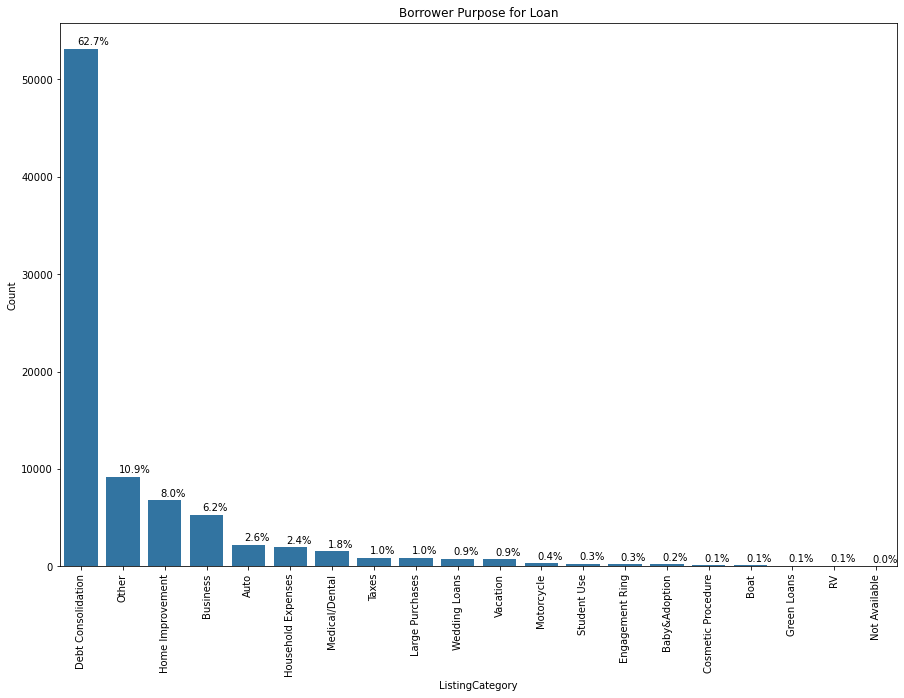

In [17]:
# loan purpose by category
plt.figure(figsize=[15,10])
category_listing_order = loan_analysis_df['ListingCategory'].value_counts().index
listing_counts = loan_analysis_df['ListingCategory'].value_counts()
sb.countplot(data = loan_analysis_df, x = 'ListingCategory', color = base_color, order=category_listing_order)
plt.ylabel('Count');
plt.title('Borrower Purpose for Loan')
plt.xticks(rotation = 90)

rating_counts = loan_analysis_df['ListingCategory'].value_counts()
for i in range(rating_counts.shape[0]):
    count = rating_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/loan_count)
    plt.text(i-0.1,count+700, pct_string, va = 'center');
plt.show()

## (Visualization 5)
#### Distribution of Borrower APR

The distribution of the Borrower APR looks multimodal with multiple peaks. Significant peaks are clustered at 0.1, 0.2, 0.3


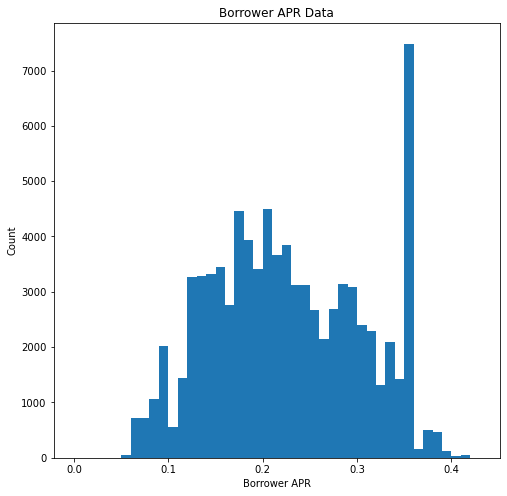

In [18]:
binsize = 0.01
bins = np.arange(0, loan_analysis_df['BorrowerAPR'].max()+binsize, binsize)

plt.figure(figsize=[8, 8])
plt.hist(data = loan_analysis_df, x = 'BorrowerAPR', bins = bins)
plt.xlabel('Borrower APR')
plt.ylabel('Count')
plt.title('Borrower APR Data')
#plt.xlim([0,1.0])
plt.show()

## (Visualization 6)
#### Employment Status vs Borrower APR and Loan Original Amount.

At range size of the loan amount, the APR has a large range, but the range of APR decrease with the increase of the loan amount. Its suffice to say, the borrower APR decrease with increase of loan amount.

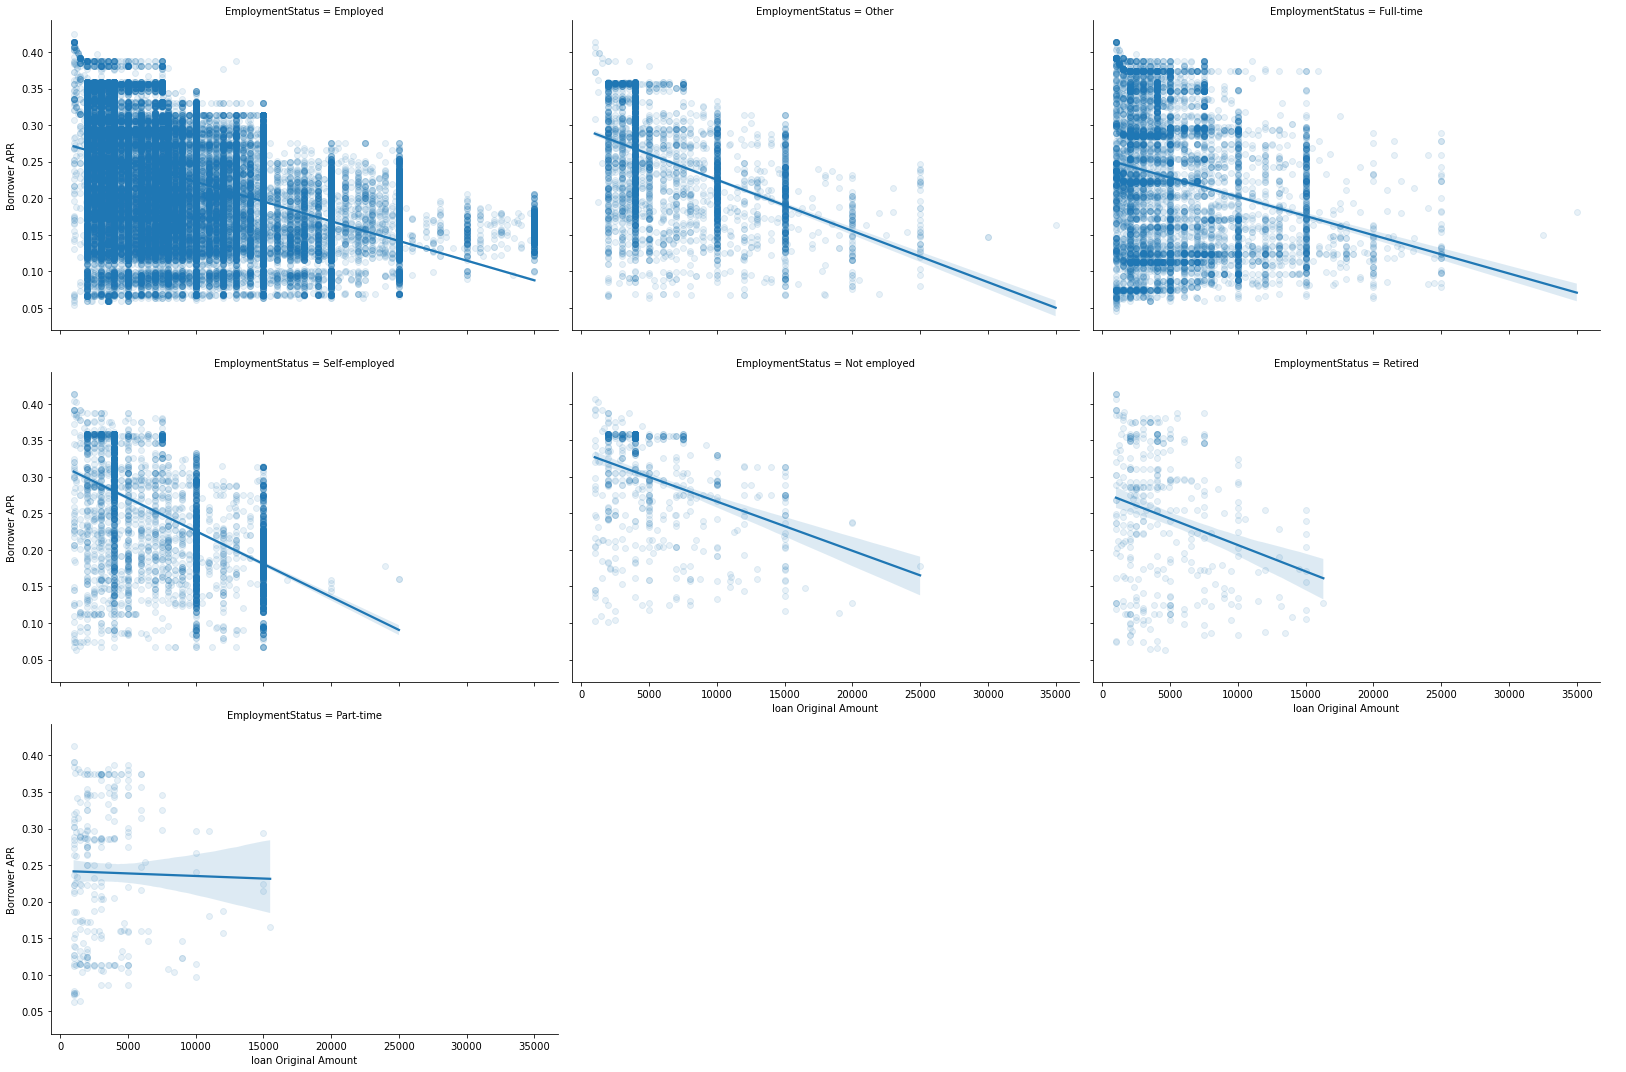

In [19]:
# Term effect on relationship of APR and loan amount
g=sb.FacetGrid(data=loan_analysis_df, height=5, col='EmploymentStatus', col_wrap=3, aspect=1.5)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();
g.set_xlabels('loan Original Amount')
g.set_ylabels('Borrower APR')

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [20]:
!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt

The system cannot find the file specified.


> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 